In [22]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def midsquare(val, n=4):
    return int(str(val**2).zfill(2*n)[n//2:-n//2])

seed = 5497
seq = [seed]
for _ in range(100):
    seq.append(midsquare(seq[-1]))

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

samples = [rng() for _ in range(1000)]


Задача 4

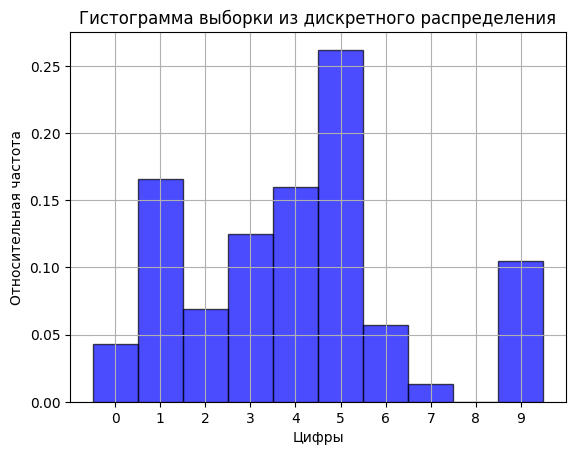

In [23]:
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weights /= weights.sum()

cdf = np.cumsum(weights)

sample_size = 1000
random_numbers = np.random.rand(sample_size)

sample = np.searchsorted(cdf, random_numbers)

plt.hist(sample, bins=np.arange(-0.5, 10.5, 1), density=True, alpha=0.7, color='blue', edgecolor='black')
plt.xticks(range(10))
plt.xlabel('Цифры')
plt.ylabel('Относительная частота')
plt.title('Гистограмма выборки из дискретного распределения')
plt.grid()
plt.show()

Задача 5

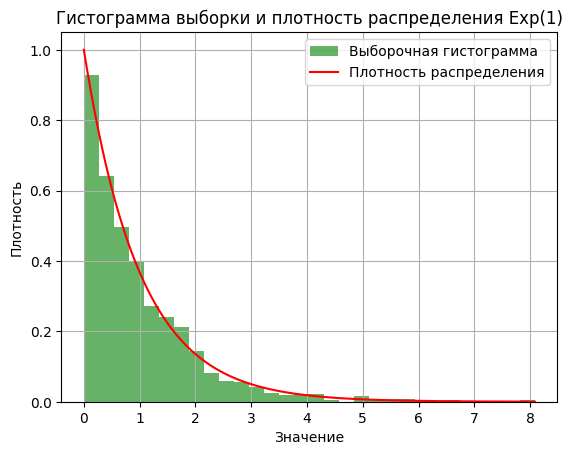

In [24]:
lambda_param = 1.0
n = 1000
U = np.random.uniform(0, 1, n)

X = -np.log(1 - U) / lambda_param

plt.hist(X, bins=30, density=True, alpha=0.6, color='g', label='Выборочная гистограмма')

x = np.linspace(0, np.max(X), 1000)
pdf = lambda_param * np.exp(-lambda_param * x)
plt.plot(x, pdf, 'r', label='Плотность распределения')

plt.title('Гистограмма выборки и плотность распределения Exp(1)')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.grid()
plt.show()

Задача 6

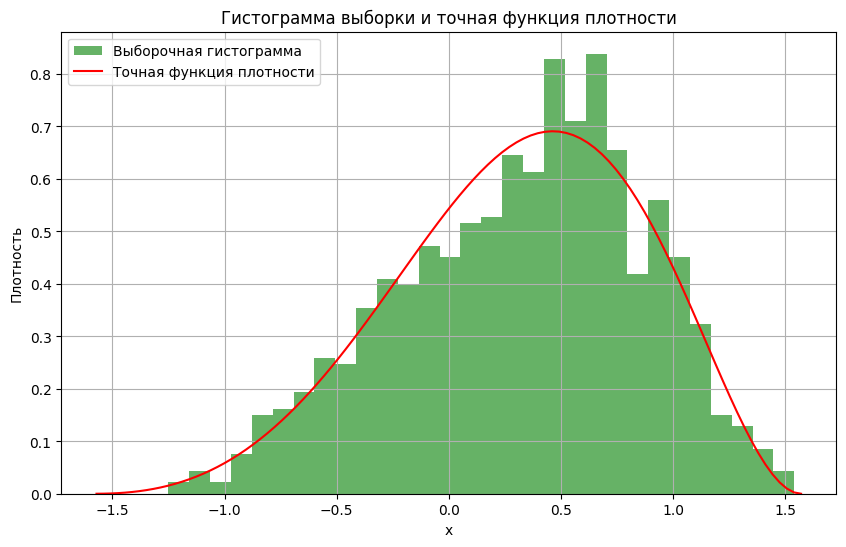

Количество принятых образцов: 1000


In [25]:
def target_density(x):
    return np.exp(x) * (np.cos(x)**2)

def proposal_density():
    return 1 / np.pi

n_samples = 1000
samples = []
accepted = 0

c = np.max(target_density(np.linspace(-np.pi/2, np.pi/2, 1000))) / (1 / np.pi)

while accepted < n_samples:
    x = np.random.uniform(-np.pi/2, np.pi/2)
    y = np.random.uniform(0, c * proposal_density())
    
    if y < target_density(x):
        samples.append(x)
        accepted += 1

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Выборочная гистограмма')

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = target_density(x) / np.trapezoid(target_density(x), x)
plt.plot(x, density, 'r', label='Точная функция плотности')

plt.title('Гистограмма выборки и точная функция плотности')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend()
plt.grid()
plt.show()

print(f'Количество принятых образцов: {accepted}')

Задача 7

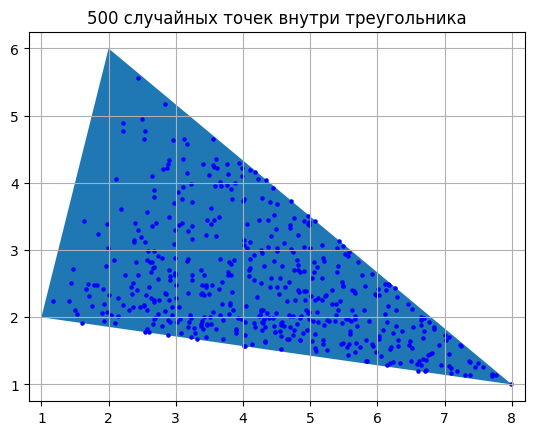

In [26]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

vertices = np.array([[1, 2], [2, 6], [8, 1]])

def generate_points_in_triangle(vertices, num_points):
    r1 = np.random.rand(num_points)
    r2 = np.random.rand(num_points)
    
    r1 = np.sqrt(r1)
    r2 = np.sqrt(r2)
    
    points = (1 - r1)[:, np.newaxis] * vertices[0] + (r1 * (1 - r2))[:, np.newaxis] * vertices[1] + (r1 * r2)[:, np.newaxis] * vertices[2]
    
    return points

num_points = 500
points = generate_points_in_triangle(vertices, num_points)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

polygon = Polygon(vertices, closed=True, fill=None, edgecolor='black')
plt.gca().add_collection(PatchCollection([polygon]))

plt.scatter(points[:, 0], points[:, 1], color='blue', s=5)

plt.xlim(0, 9)
plt.ylim(0, 7)
plt.axis('equal')
plt.title('500 случайных точек внутри треугольника')
plt.grid()
plt.show()

Задача 8

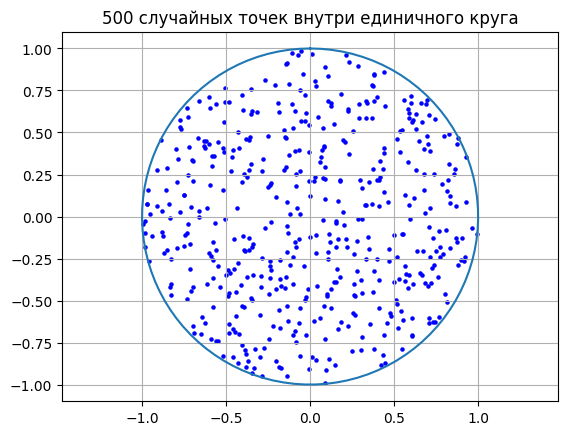

In [27]:
num_points = 500

angles = np.random.uniform(0, 2 * np.pi, num_points)
radius = np.sqrt(np.random.uniform(0, 1, num_points))

x = radius * np.cos(angles)
y = radius * np.sin(angles)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))

plt.scatter(x, y, color='blue', s=5)

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.axis('equal')
plt.title('500 случайных точек внутри единичного круга')
plt.grid()
plt.show()

Задача 9

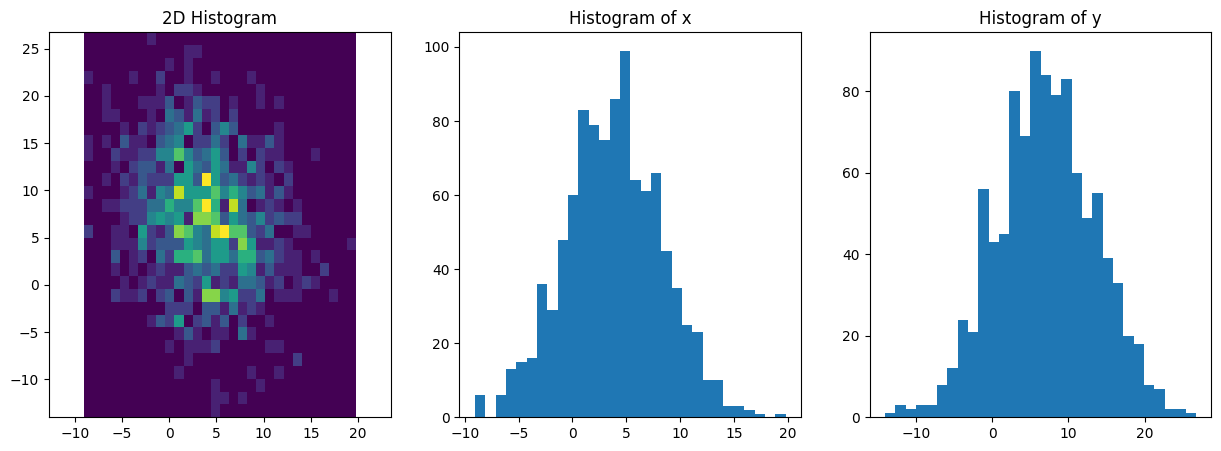

Выборочное среднее: [3.78469887 7.08149582]
Точная среднее: [4 7]
Выборочная ковариационная матрица:
 [[20.15960825 -6.12015622]
 [-6.12015622 41.53808706]]
Точная ковариационная матрица:
 [[20 -4]
 [-4 40]]


In [28]:
def box_muller_no_trig(n):
    i_dont_know_what_to_name_it = np.zeros((2, n))
    for i in range(n):
        while True:
            x, y = 2 * np.random.rand(2) - 1
            r = x**2 + y**2
            if 0 < r < 1:
                break
        factor = np.sqrt(-2 * np.log(r) / r)

        i_dont_know_what_to_name_it[:, i] = np.array([x, y]) * factor
    return i_dont_know_what_to_name_it[0], i_dont_know_what_to_name_it[1]

n = 1000
mean = np.array([4, 7])
cov = np.array([[20, -4], [-4, 40]])

#u1, u2 = np.random.rand(2, n)
#r = np.sqrt(-2 * np.log(u1))
#z0 = r * np.cos(2 * np.pi * u2)
#z1 = r * np.sin(2 * np.pi * u2)

z0, z1 = box_muller_no_trig(n)

z = np.vstack((z0, z1)).T
samples = mean + z @ np.linalg.cholesky(cov).T

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
ax[0].hist2d(samples[:, 0], samples[:, 1], bins=30)
ax[0].axis('equal')
ax[1].hist(samples[:, 0], bins=30)
ax[2].hist(samples[:, 1], bins=30)
ax[0].set_title("2D Histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

sample_mean = np.mean(samples, axis=0)
sample_cov = np.cov(samples.T)

print("Выборочное среднее:", sample_mean)
print("Точная среднее:", mean)
print("Выборочная ковариационная матрица:\n", sample_cov)
print("Точная ковариационная матрица:\n", cov)